# News Recommender System
### By:- Aarushi Gupta

iPrint was managing its customer base by only recommending the most popular and similar news articles to what the user has already read or watched. However, the recommended news articles were often not relevant to the majority of the users. It was not able to recommend any new content to its customers, and gradually, the company started losing such users, which eventually resulted in immense revenue loss.
iPrint being a cutting-edge company, is trying to solve this issue of revenue leakage by personalising user tastes and introducing new content to its users at the start of the day on the home page of the application. iPrint is planning to assess these recommendations by tracking whether the user clicks on those items or not. 

### Loading platform_content dataset for content based filtering

In [1]:
# importing relevent libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
content_df = pd.read_csv('Dataset/data/platform_content.csv')

In [3]:
# printing first few rows of the dataset
content_df.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [4]:
#Increase column width to see Keywords values properly
pd.set_option('max_colwidth', None)

In [5]:
#Analysis on Keywords Column
content_df['text_description'].str.len()

0        6543
1        6543
2        1993
3        1520
4        8093
        ...  
3117     2891
3118     1703
3119    16970
3120     6530
3121      346
Name: text_description, Length: 3122, dtype: int64

In [6]:
# mean length of content columns
np.mean(content_df['text_description'].str.len())

5449.734144778988

In [7]:
#Number of Keywords:
number_of_keywords = []
for keywords in content_df['text_description']:
    n_keywords = len(keywords.split())
    number_of_keywords.append(n_keywords)

In [8]:
sum(number_of_keywords)

2809750

## EDA and Plots

In [9]:
# importing relevent libraries for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Histogram to analyse distribution of words 

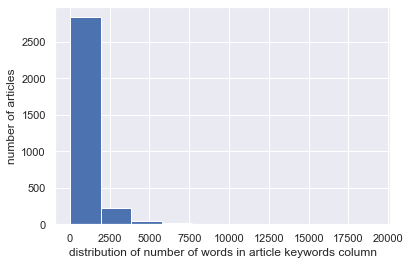

In [10]:
plt.hist(number_of_keywords)
plt.xlabel('distribution of number of words in article keywords column')
plt.ylabel('number of articles')
plt.show()

#### Countplot for getting most common language in which articles are published

In [11]:
content_df["language"].value_counts()

en    2264
pt     850
la       4
es       2
ja       2
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

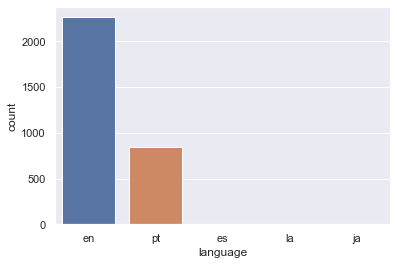

In [12]:
sns.countplot(x=content_df["language"])

- As can be seen the most common language for the content is ENGLISH

#### Countplot for getting most popular country from which articles are launched

In [13]:
content_df["producer_country"].value_counts()

BR    613
US     59
CA      5
AU      2
PT      1
Name: producer_country, dtype: int64

<AxesSubplot:xlabel='producer_country', ylabel='count'>

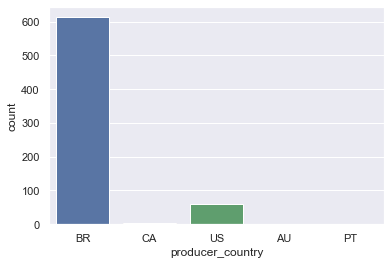

In [14]:
sns.countplot(x=content_df["producer_country"])

- As can be seen from countplot, the most popular country that consumes the articles on the platform is BRAZIL

#### Countplot for getting type of item on the platform

In [15]:
content_df["item_type"].value_counts()

HTML     3101
VIDEO      11
RICH       10
Name: item_type, dtype: int64

<AxesSubplot:xlabel='item_type', ylabel='count'>

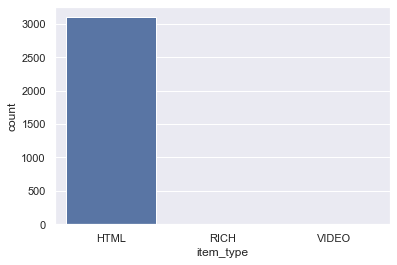

In [16]:
sns.countplot(x=content_df["item_type"])

- As can be seen from countplot, the most common item type on the platform is HTML

## Content Based Filtering

In [17]:
# creating first checkpoint for the dataframe
contents = content_df.copy()

In [18]:
# importing relevent libraries for content based filtering
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

In [19]:
# creating list of stopwords
stop = stopwords.words('english')

#### Preprocessing of text in the dataset

In [20]:
# removing all the stopwords from the text
contents['text_cleaned'] = contents["text_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
# removing all punctuations and numerical data from the text
contents["text_cleaned"] = contents['text_cleaned'].str.replace('[^A-Za-z\s]','')
# removing all the words with length less than and equal to 3 from the text
contents["text_cleaned"] = contents['text_cleaned'].str.replace(r'\b(\w{1,3})\b', '')

In [21]:
# keeping only the relevent columns from the data which are required for content based filtering
contents = contents[['title', 'text_cleaned']]

In [22]:
contents.head(2)

title  \
0  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [23]:
#Create numpy array from keywords column
keywords_array = contents['text_cleaned'].to_numpy()

In [24]:
keywords_array[0]

' work still early  first full public version ethereum software recently released system could face technical legal problems tarnished bitcoin many bitcoin advocates  ethereum face security problems bitcoin greater complexity software thus  ethereum faced much less testing many fewer attacks bitcoin  novel design ethereum  also invite intense scrutiny authorities given potentially fraudulent contracts like ponzi schemes written directly ethereum system  sophisticated capabilities system made fascinating executives corporate america  said last year experimenting ethereum  control real world objects socalled internet things microsoft working several projects make easier  ethereum computing cloud azure ethereum general platform solve problems many industries using fairly elegant solution  elegant solution seen date said marley gray director business development strategy microsoft  gray responsible microsofts work blockchains database concept bitcoin introduced blockchains designed store t

In [25]:
#Generate Words from Keywords Array by Splitting
words_list = []
for keyword in keywords_array:
    splitted_words = keyword.lower().split()
    words_list.append(splitted_words)

In [26]:
# printing length of all word lists, word list for each article
len(words_list), len(words_list[0]), len(words_list[1])

(3122, 558, 558)

In [27]:
## create dictionary
dictionary = Dictionary(words_list) 

In [28]:
dictionary

In [29]:
# length of dictionary
len(dictionary)

79715

In [30]:
#Total number of words in the words_list
number_words = 0
for word in words_list:
    number_words = number_words + len(word)

In [31]:
number_words

1486709

In [32]:
dictionary.get(0), dictionary.get(1), dictionary.get(100)

('actual', 'advocates', 'ether')

In [33]:
## generate bag of words for just one document
bow = dictionary.doc2bow(words_list[0])

In [34]:
len(words_list[0]), len(bow)

(558, 368)

#### Generate Corpus by creating BOW of each document
doc2bow = Document to BOW[Bag of word]

In [35]:
corpus = [dictionary.doc2bow(doc) for doc in words_list] 

In [36]:
len(corpus), len(corpus[0]), len(corpus[1])

(3122, 368, 368)

In [37]:
len(words_list), len(words_list[0])

(3122, 558)

#### TF-IDF Model
TF = Term frequency -> count/no.
IDF = Inverse doc freq. -> log(N/n)

In [38]:
tfidf = TfidfModel(corpus)

In [39]:
# printing tfidf scores for first article
tfidf[corpus[0]]

[(0, 0.016546289549304028),
 (1, 0.03212591960897094),
 (2, 0.02386075262474484),
 (3, 0.029507519057591063),
 (4, 0.0166044280578457),
 (5, 0.023873824842188487),
 (6, 0.012696783152082274),
 (7, 0.03854402095733749),
 (8, 0.021587309834987932),
 (9, 0.008329832245131032),
 (10, 0.01249558231256016),
 (11, 0.011412115828808248),
 (12, 0.04134558063215152),
 (13, 0.019221110801214795),
 (14, 0.0264070747380978),
 (15, 0.03000079314534766),
 (16, 0.03177367309877653),
 (17, 0.03539598847705732),
 (18, 0.025355571750409967),
 (19, 0.014354020859829687),
 (20, 0.022581146759072572),
 (21, 0.05876741615624977),
 (22, 0.009614133452896165),
 (23, 0.014994316265126215),
 (24, 0.01748181477939552),
 (25, 0.031069252849186248),
 (26, 0.029274939146210478),
 (27, 0.3392959077155402),
 (28, 0.10226405712333342),
 (29, 0.12000317258139064),
 (30, 0.02281669018875926),
 (31, 0.08563126972666482),
 (32, 0.020846904149753577),
 (33, 0.06854481410268515),
 (34, 0.0201339832848464),
 (35, 0.0088632788

#### Generate Similarity Matrix

In [40]:
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [41]:
sims

In [42]:
len(sims[corpus[0]])

3122

#### Make Recommendations

In [43]:
# title of article for which recommendations are needed
article_title = 'IBM Wants to "Evolve the Internet" With Blockchain Technology'

In [44]:
# number of similar articles to be recommended
n = 5

In [45]:
#Get the article row
article = contents.loc[contents.title == article_title]

In [46]:
article

title  \
4  IBM Wants to "Evolve the Internet" With Blockchain Technology   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [47]:
#Generate words_list by splitting the keywords column for the query article
words_list = article['text_cleaned'].iloc[0].split()

In [48]:
#set the query_doc to the words_list
query_doc = words_list

In [49]:
#get bag of words from the query_doc
query_doc_bow = dictionary.doc2bow(query_doc)

In [50]:
query_doc_tfidf = tfidf[query_doc_bow]

In [51]:
query_doc_tfidf

[(5, 0.010086608921768292),
 (6, 0.014304925953128574),
 (10, 0.010558681138837208),
 (11, 0.019286318819210783),
 (12, 0.013974692542536742),
 (18, 0.08570113517203029),
 (21, 0.04965806258772577),
 (27, 0.2508648704966499),
 (28, 0.3802146706034286),
 (34, 0.01701307744143179),
 (38, 0.007440448029412261),
 (55, 0.013836842011199172),
 (57, 0.013559048939951041),
 (63, 0.023692152681454717),
 (64, 0.01783235215685674),
 (71, 0.00544637628980749),
 (75, 0.016204107856804956),
 (87, 0.011176776210138397),
 (88, 0.015374694975277681),
 (101, 0.08925518635134047),
 (107, 0.02024290818142741),
 (118, 0.01807753214793073),
 (121, 0.013189267122782672),
 (122, 0.017057021881256507),
 (123, 0.005151104418051437),
 (127, 0.016883426299206705),
 (130, 0.09883910352351072),
 (132, 0.009590292100538158),
 (138, 0.009363848371514907),
 (142, 0.01043349758129334),
 (143, 0.015704386403079678),
 (150, 0.021092052981059463),
 (159, 0.012392547901834717),
 (164, 0.08445628854369597),
 (173, 0.0220166

In [52]:
similarity_array = sims[query_doc_tfidf]

In [53]:
len(similarity_array)

3122

In [54]:
#Create a Series to Visualize Similarity Score along with article Names
similarity_series = pd.Series(similarity_array.tolist(), index=contents.title.values)

In [55]:
similarity_series

Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's                                      0.222332
Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's                                      0.222332
Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump                                           0.027681
Google Data Center 360° Tour                                                                                 0.015793
IBM Wants to "Evolve the Internet" With Blockchain Technology                                                1.000000
                                                                                                               ...   
Conheça a Liga IoT, plataforma de inovação aberta que irá acelerar projetos ligados a Internet das Coisas    0.010276
Amazon takes on Skype and GoToMeeting with its Chime video conferencing app                                  0.013012
Code.org 2016 Annual Report                             

In [56]:
#Sort the series to get Top Recommended articles
recommended_articles = similarity_series.sort_values(ascending=False)[1:n+1]

In [57]:
recommended_articles

Are you a bitcoin denialist? - Chris Skinner's blog            0.354054
Venture Capitalists Inject Nearly Half a Billion in Bitcoin    0.301252
Blockchain won't kill banks: Bitcoin pioneer                   0.285944
Red Hat OpenShift Blockchain Initiative Focuses On Ethereum    0.282205
Confused by blockchains? Revolution vs Evolution               0.269431
dtype: float64

In [58]:
#Get highest TF-IDF values words for the query articles which influenced the Recommendations
sorted_tfidf_weights = sorted(tfidf[corpus[article.index.values.tolist()[0]]], key=lambda w: w[1], reverse=True)

In [59]:
print('Top words associated with this new article by tf-idf are: ')
for term_id, weight in sorted_tfidf_weights[:5]:
    print(" '%s' %.5f" %(dictionary.get(term_id), weight))

Top words associated with this new article by tf-idf are: 
 'wolpert' 0.61265
 'blockchain' 0.38021
 'bitcoin' 0.25086
 'linux' 0.15157
 'ripple' 0.14955


#### Creating a Modular code by creating a function for Query Movie Input

In [60]:
def news_recommendation(article_title):
    article = contents.loc[contents.title == article_title] # get the article row
    keywords = article['text_cleaned'].iloc[0].split() #get the keywords as a Series (article['text_description_cleaned']),
    # get just the keywords string ([0]), and then convert to a list of keywords (.split() )
    query_doc = keywords #set the query_doc to the list of keywords
    
    query_doc_bow = dictionary.doc2bow(query_doc) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our article and every other article. 
    #So the length is the number of articles we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=contents.title.values) #Convert to a Series
    recommended_articles = similarity_series.sort_values(ascending=False)
    #get the top matching results, i.e. most similar articles; start from index 1 because every article is most similar to itself
    #print("Top Recommended News articles along with Similarity Score: ")
    return recommended_articles

In [61]:
news_recommendation('IBM Wants to "Evolve the Internet" With Blockchain Technology')

IBM Wants to "Evolve the Internet" With Blockchain Technology        1.000000
Are you a bitcoin denialist? - Chris Skinner's blog                  0.354054
Venture Capitalists Inject Nearly Half a Billion in Bitcoin          0.301252
Blockchain won't kill banks: Bitcoin pioneer                         0.285944
Red Hat OpenShift Blockchain Initiative Focuses On Ethereum          0.282205
                                                                       ...   
O que é capitalização?                                               0.000000
Microsseguro                                                         0.000000
Irresistível: cebola recheada com carne moída e enrolada no bacon    0.000000
Steak Tartare com Salada Verde                                       0.000000
SOA com microserviços - Sensedia                                     0.000000
Length: 3122, dtype: float64

In [62]:
news_recommendation('Google Data Center 360° Tour')

Google Data Center 360° Tour                                                1.000000
YouTube's New Messenger Means You'll Never Have to Leave YouTube            0.245944
Google shares data center security and design best practices                0.227117
This year's Founders' Letter                                                0.225985
[Tools] How to Record your Desktop Screen with YouTube                      0.192810
                                                                              ...   
Squads não-suicidas - Hipsters #08                                          0.000000
Sem Parar vs Conectcar - DanBP.org                                          0.000000
Startup usa algoritmo e rede social para aprovar empréstimos | EXAME.com    0.000000
DBA BRASIL no INTEROPMIX 2016                                               0.000000
The 2017 Acquia Partners of the Year                                        0.000000
Length: 3122, dtype: float64

### Loading platform_content and consumer_transactions dataset for item and user based collaborative filtering

In [63]:
## load content data
content_df = pd.read_csv('Dataset/data/platform_content.csv')

In [64]:
# shape of content dataset
content_df.shape

(3122, 13)

In [65]:
# columns in content dataset
content_df.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language'],
      dtype='object')

In [66]:
## loading ratings/user dataset
consumer_df = pd.read_csv('Dataset/data/consumer_transanctions.csv')

In [67]:
# printing first 3 rows for user dataset
consumer_df.head(3)

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.24 Safari/537.36",NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN


In [68]:
consumer_df.shape

(72312, 8)

In [69]:
consumer_df['interaction_type'].value_counts()

content_watched         61086
content_liked            5745
content_saved            2463
content_commented_on     1611
content_followed         1407
Name: interaction_type, dtype: int64

In [70]:
# mapping interaction type to respective ratings value for further analysis
consumer_df['ratings'] = consumer_df['interaction_type'].map({'content_followed': 5, 'content_commented_on': 4,
                                                             'content_saved': 3, 'content_liked': 2, 'content_watched': 1})

In [71]:
consumer_df.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country,ratings
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.24 Safari/537.36",NY,US,1
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,5
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN,1


In [72]:
# keeping only the relevent columns for both the content dataset and user dataset
ratings_df = consumer_df[['consumer_id', 'item_id', 'ratings']]
news_df = content_df[['item_id', 'title']]

In [73]:
ratings_df.head()

,consumer_id,item_id,ratings
0,-8845298781299428018,-3499919498720038879,1
1,-1032019229384696495,8890720798209849691,1
2,-1130272294246983140,310515487419366995,1
3,344280948527967603,310515487419366995,5
4,-445337111692715325,-7820640624231356730,1


In [74]:
news_df.head()

,item_id,title
0,-6451309518266745024,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump
3,-6151852268067518688,Google Data Center 360° Tour
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology"


In [75]:
# unique number of users 
n_users = ratings_df.consumer_id.nunique()
# unique number of articles
n_items = ratings_df.item_id.nunique()
print("Unique number of users are:", n_users)
print("Unique number of articles are:", n_items)

Unique number of users are: 1895
Unique number of articles are: 2987


### Dividing the dataset into train and test

In [76]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_df, test_size=0.20, random_state=31)

In [77]:
print(train.shape)
print(test.shape)

(57849, 3)
(14463, 3)


In [78]:
train.head()

,consumer_id,item_id,ratings
9257,7167124757087633794,764116021156146784,2
71686,-2772844562500836582,3099207916247126790,1
23556,-2626634673110551643,6090517797383271316,1
51229,3061273947166110301,-1119244241345534741,5
9583,692689608292948411,2280365999288629014,1


### Creating user*article Train matrix with rating values

In [79]:
data_matrix = train.pivot_table(
    index='consumer_id',
    columns='item_id',
    values='ratings', aggfunc='mean').fillna(0)

In [80]:
data_matrix.head()

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9184137057748005562,-9176143510534135851,-9172673334835262304,-9171475473795142532,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
consumer_id,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
data_matrix.shape

(1846, 2944)

### Creating user*article Test matrix with rating values

In [82]:
data_matrix_test = test.pivot_table(
    index='consumer_id',
    columns='item_id',
    values='ratings', aggfunc='mean').fillna(0)

In [83]:
data_matrix_test.shape

(1445, 2491)

### Creating user*article full matrix with rating values

In [84]:
data_matrix_full = ratings_df.pivot_table(
    index='consumer_id',
    columns='item_id',
    values='ratings', aggfunc='mean').fillna(0)

In [85]:
data_matrix_full.shape

(1895, 2987)

In [86]:
data_matrix_full.head()

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9184137057748005562,-9176143510534135851,-9172673334835262304,-9171475473795142532,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
consumer_id,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User based filtering

### Pairwise Distance

In [87]:
# importing relevent package from sklearn to calculate pairwise distance
from sklearn.metrics.pairwise import pairwise_distances 

In [88]:
user_similarity = 1- pairwise_distances(data_matrix, metric='cosine')

In [89]:
user_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.04671418,
        0.02935113],
       [0.        , 1.        , 0.15226378, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15226378, 1.        , ..., 0.27864803, 0.17595989,
        0.        ],
       ...,
       [0.        , 0.        , 0.27864803, ..., 1.        , 0.08701035,
        0.        ],
       [0.04671418, 0.        , 0.17595989, ..., 0.08701035, 1.        ,
        0.        ],
       [0.02935113, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [90]:
user_similarity.shape

(1846, 1846)

In [91]:
#Get similar recommended articles for a user_id
item_prediction = np.dot(user_similarity, data_matrix)

In [92]:
item_prediction

array([[0.690344  , 0.47667181, 0.49386656, ..., 0.45295296, 0.955164  ,
        0.15387906],
       [0.04484225, 1.60225011, 0.03924877, ..., 0.05114988, 0.45580575,
        0.08673937],
       [0.08006159, 4.00619943, 0.41458854, ..., 0.10845297, 0.68625952,
        0.08912569],
       ...,
       [0.04134812, 0.52165472, 0.49509347, ..., 0.09833712, 0.43341653,
        0.06556695],
       [0.3283663 , 0.71132135, 0.69706292, ..., 0.22545299, 0.7034035 ,
        0.06643182],
       [0.11880123, 0.17652085, 1.37603858, ..., 0.12601026, 1.02583553,
        0.0788087 ]])

In [93]:
item_prediction.shape

(1846, 2944)

In [94]:
# creating a dataframe with item prediction matrix 
prediction_df = pd.DataFrame(item_prediction, index = data_matrix.index, columns=data_matrix.columns)

In [95]:
prediction_df.head()

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9184137057748005562,-9176143510534135851,-9172673334835262304,-9171475473795142532,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
consumer_id,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.690344,0.476672,0.493867,2.068414,0.156701,0.964376,0.031607,0.945829,0.060500,0.320193,...,0.550698,0.607846,0.455457,0.346190,0.536709,0.097755,0.821612,0.452953,0.955164,0.153879
-9212075797126931087,0.044842,1.602250,0.039249,0.348751,0.000000,0.620155,0.000000,0.375171,0.064998,0.000000,...,0.000000,0.102284,0.031975,0.020383,0.138197,0.027312,0.162704,0.051150,0.455806,0.086739
-9207251133131336884,0.080062,4.006199,0.414589,1.067204,0.054767,0.839171,0.000000,0.757267,0.019533,0.121881,...,0.396488,0.270071,0.096343,0.038576,0.231120,0.285860,0.393552,0.108453,0.686260,0.089126
-9199575329909162940,0.299551,0.056609,0.045482,0.159132,0.103207,0.182045,0.000000,0.532483,0.000000,0.069293,...,0.175889,0.274874,0.086991,0.164768,0.081493,0.042655,0.147610,0.136191,0.154358,0.028330
-9196668942822132778,0.036337,0.000000,0.865647,1.059323,0.036337,0.527295,0.030644,0.150874,0.020949,0.030350,...,0.033894,0.065113,0.058742,0.036337,0.439148,0.058926,0.181856,0.031598,0.313504,0.030786


In [96]:
prediction_df.shape

(1846, 2944)

In [97]:
# making prediction for user located at index 33 of the dataframe(any random user)
prediction_df.iloc[33]

item_id
-9222795471790223670    0.265510
-9216926795620865886    0.189426
-9194572880052200111    0.923195
-9192549002213406534    2.614002
-9190737901804729417    0.080680
                          ...   
 9213260650272029784    0.131529
 9215261273565326920    0.603779
 9217155070834564627    0.217352
 9220445660318725468    1.302544
 9222265156747237864    0.145500
Name: -8830250090736356260, Length: 2944, dtype: float64

In [98]:
# sorting values with highest distance at first giving most similar article for that user
prediction_df.iloc[33].sort_values(ascending=False)[:10]

item_id
-6843047699859121724    14.648443
-8208801367848627943    10.762224
-4333957157636611418    10.448007
 8901449108040307914     8.795220
 9175693555063886126     8.316572
-3191013159715472435     7.966767
-8954346068661072425     7.423551
 1992928170409443117     7.421259
 5854206600849997966     7.341173
 6989198691754522425     7.215084
Name: -8830250090736356260, dtype: float64

In [99]:
# creating a dataframe for storing results for the particular user
recommended_articles_df = pd.DataFrame(prediction_df.iloc[33].sort_values(ascending=False))

In [100]:
recommended_articles_df.head()

,-8830250090736356260
item_id,
-6843047699859121724,14.648443
-8208801367848627943,10.762224
-4333957157636611418,10.448007
8901449108040307914,8.795220
9175693555063886126,8.316572


In [101]:
# resetting the index
recommended_articles_df.reset_index(inplace=True)

In [102]:
recommended_articles_df.head()

,item_id,-8830250090736356260
0,-6843047699859121724,14.648443
1,-8208801367848627943,10.762224
2,-4333957157636611418,10.448007
3,8901449108040307914,8.795220
4,9175693555063886126,8.316572


In [103]:
# renaminig the columns
recommended_articles_df.columns = ['item_id', 'score']

In [104]:
recommended_articles_df.head()

,item_id,score
0,-6843047699859121724,14.648443
1,-8208801367848627943,10.762224
2,-4333957157636611418,10.448007
3,8901449108040307914,8.795220
4,9175693555063886126,8.316572


In [105]:
#Merge item_id with article title
merged_user = pd.merge(recommended_articles_df, news_df, on='item_id', how='left')

In [106]:
# printing final dataframe for the user with item_id, distance score and title
merged_user.head()

,item_id,score,title
0,-6843047699859121724,14.648443,"Ganhe 6 meses de acesso ao Pluralsight, maior plataforma de treinamento online"
1,-8208801367848627943,10.762224,Ray Kurzweil: The world isn't getting worse - our information is getting better
2,-4333957157636611418,10.448007,Why Programmers Want Private Offices
3,8901449108040307914,8.795220,Monitoramento em tempo real com Elasticsearch e Kibana
4,9175693555063886126,8.316572,15 minutos sobre Docker


## Item based filtering

### Articles pairwise similarity distance

In [107]:
# taking transpose of the data matrix and then calculating item similarity scores
item_similarity = 1- pairwise_distances(data_matrix.T, metric='cosine')

In [108]:
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.33290236, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.05705015,
        0.        ],
       ...,
       [0.33290236, 0.        , 0.        , ..., 1.        , 0.0696304 ,
        0.        ],
       [0.        , 0.        , 0.05705015, ..., 0.0696304 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [109]:
item_similarity.shape

(2944, 2944)

In [110]:
# creating the dataframe
item_prediction_2 = pd.DataFrame(item_similarity, index = data_matrix.columns, columns=data_matrix.columns)

In [111]:
item_prediction_2.head()

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9184137057748005562,-9176143510534135851,-9172673334835262304,-9171475473795142532,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
item_id,,,,,,,,,,,,,,,,,,,,,
-9222795471790223670,1.000000,0.0,0.000000,0.116120,0.143933,0.000000,0.0,0.324715,0.000000,0.000000,...,0.256527,0.273621,0.000000,0.648180,0.000000,0.000000,0.000000,0.332902,0.000000,0.0
-9216926795620865886,0.000000,1.0,0.000000,0.000000,0.000000,0.040170,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
-9194572880052200111,0.000000,0.0,1.000000,0.102506,0.000000,0.092775,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.136726,0.077344,0.068422,0.000000,0.057050,0.0
-9192549002213406534,0.116120,0.0,0.102506,1.000000,0.000000,0.119808,0.0,0.099376,0.141147,0.122237,...,0.000000,0.144746,0.063123,0.105860,0.258056,0.057623,0.067968,0.177466,0.141679,0.0
-9190737901804729417,0.143933,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.160019,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [112]:
# getting recommendations for item at index 100 of the dataframe(random article)
item_prediction_2.iloc[100]

item_id
-9222795471790223670    0.000000
-9216926795620865886    0.000000
-9194572880052200111    0.000000
-9192549002213406534    0.188689
-9190737901804729417    0.000000
                          ...   
 9213260650272029784    0.000000
 9215261273565326920    0.000000
 9217155070834564627    0.000000
 9220445660318725468    0.000000
 9222265156747237864    0.000000
Name: -8728075196312712282, Length: 2944, dtype: float64

In [113]:
# sorting articles depending on the highest score
item_recommendation = pd.DataFrame(item_prediction_2.iloc[100].sort_values(ascending=False))

In [114]:
item_recommendation.head()

,-8728075196312712282
item_id,
-8728075196312712282,1.000000
-273156842634169039,0.642705
4235212484048164433,0.642705
3742318026370211556,0.642705
5322532051893153382,0.642705


In [115]:
# resetting the index
item_recommendation.reset_index(inplace=True)

In [116]:
item_recommendation.head()

,item_id,-8728075196312712282
0,-8728075196312712282,1.000000
1,-273156842634169039,0.642705
2,4235212484048164433,0.642705
3,3742318026370211556,0.642705
4,5322532051893153382,0.642705


In [117]:
# renamining the columns
item_recommendation.columns = ['item_id', 'score']

In [118]:
item_recommendation.head()

,item_id,score
0,-8728075196312712282,1.000000
1,-273156842634169039,0.642705
2,4235212484048164433,0.642705
3,3742318026370211556,0.642705
4,5322532051893153382,0.642705


In [119]:
merged_item = pd.merge(item_recommendation, news_df, on='item_id', how='left')

In [120]:
# getting most similar item recommendations
merged_item.head()

,item_id,score,title
0,-8728075196312712282,1.000000,Soylent's new drink will replace your breakfast and morning coffee
1,-273156842634169039,0.642705,4K movies come to the Google Play Movies & TV app
2,4235212484048164433,0.642705,Coca-cola traz ao Brasil sabores cereja e baunilha
3,3742318026370211556,0.642705,Second Gravitational Wave Detected at LIGO
4,5322532051893153382,0.642705,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet


In [121]:
collab_output = merged_item[merged_item['title'].notna()]

In [122]:
collab_output.shape

(3001, 3)

In [123]:
collab_output.head()

,item_id,score,title
0,-8728075196312712282,1.000000,Soylent's new drink will replace your breakfast and morning coffee
1,-273156842634169039,0.642705,4K movies come to the Google Play Movies & TV app
2,4235212484048164433,0.642705,Coca-cola traz ao Brasil sabores cereja e baunilha
3,3742318026370211556,0.642705,Second Gravitational Wave Detected at LIGO
4,5322532051893153382,0.642705,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet


### Min Max Normalization

In [124]:
# normalizing the scores
collab_output['collaborative_score_normalized'] = (collab_output['score']-min(collab_output['score']))/(max(collab_output['score'])-min(collab_output['score']))

In [125]:
collab_output.head()

,item_id,score,title,collaborative_score_normalized
0,-8728075196312712282,1.000000,Soylent's new drink will replace your breakfast and morning coffee,1.000000
1,-273156842634169039,0.642705,4K movies come to the Google Play Movies & TV app,0.642705
2,4235212484048164433,0.642705,Coca-cola traz ao Brasil sabores cereja e baunilha,0.642705
3,3742318026370211556,0.642705,Second Gravitational Wave Detected at LIGO,0.642705
4,5322532051893153382,0.642705,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.642705


In [126]:
# most similar articles after normalizing the scores
collab_output['title'][:10]

0                                Soylent's new drink will replace your breakfast and morning coffee
1                                                 4K movies come to the Google Play Movies & TV app
2                                                Coca-cola traz ao Brasil sabores cereja e baunilha
3                                                        Second Gravitational Wave Detected at LIGO
4                         Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet
5                         Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet
6    DTCC and Digital Asset Holdings to Test Blockchain Solutions for the $2.6 Trillion Repo Market
7                                                    Detecting the use of "curl | bash" server side
8                 Desinformação (até do Senado) faz motoristas acenderem farol à toa - Outra Cidade
9                          Bitit Launches to Solve Bitcoin Biggest Issues - Accessibility and Fraud


## Hybrid: Combine two Models

In [127]:
# taking any random article for content based filtering
content_output = news_recommendation("Up your app's sharing game with DirectShare - Google Developers")

In [128]:
content_output[:10]

Up your app's sharing game with DirectShare - Google Developers              1.000000
5 reasons your employees aren't sharing their knowledge                      0.125351
Sam Newman - Backends For Frontends                                          0.120694
Bots won't replace apps. Better apps will replace apps.                      0.104206
Android Fundamentals: IntentService Basics                                   0.103643
Why porting an iOS design to Android will not work                           0.102141
Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet    0.093396
Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet    0.091836
Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet    0.091836
Introducing Casting into Hangouts                                            0.088983
dtype: float64

In [129]:
# storing the result in a dataframe
content_df = pd.DataFrame(content_output)

In [130]:
content_df.head()

,0
Up your app's sharing game with DirectShare - Google Developers,1.000000
5 reasons your employees aren't sharing their knowledge,0.125351
Sam Newman - Backends For Frontends,0.120694
Bots won't replace apps. Better apps will replace apps.,0.104206
Android Fundamentals: IntentService Basics,0.103643


In [131]:
# resetting the index
content_df.reset_index(inplace=True)

In [132]:
# renaming the columns
content_df.columns = ['title', 'score']

In [133]:
content_df.head()

,title,score
0,Up your app's sharing game with DirectShare - Google Developers,1.000000
1,5 reasons your employees aren't sharing their knowledge,0.125351
2,Sam Newman - Backends For Frontends,0.120694
3,Bots won't replace apps. Better apps will replace apps.,0.104206
4,Android Fundamentals: IntentService Basics,0.103643


In [134]:
# normalizing the scores
content_df['content_score_normalized'] = (content_df['score']-min(content_df['score'])) / (max(content_df['score']) - min(content_df['score']))

In [135]:
content_df.head()

,title,score,content_score_normalized
0,Up your app's sharing game with DirectShare - Google Developers,1.000000,1.000000
1,5 reasons your employees aren't sharing their knowledge,0.125351,0.125351
2,Sam Newman - Backends For Frontends,0.120694,0.120694
3,Bots won't replace apps. Better apps will replace apps.,0.104206,0.104206
4,Android Fundamentals: IntentService Basics,0.103643,0.103643


In [136]:
content_df.describe()

,score,content_score_normalized
count,3122.000000,3122.000000
mean,0.016737,0.016737
std,0.023599,0.023599
min,0.000000,0.000000
25%,0.002117,0.002117
50%,0.013902,0.013902
75%,0.024924,0.024924
max,1.000000,1.000000


In [137]:
content_df.shape

(3122, 3)

### Combining two Models- Content based and Collaborative based 

In [138]:
# merging the collab output result and content based result on title
hybrid_output = pd.merge(collab_output,content_df, how='left', on='title')

In [139]:
hybrid_output.head()

,item_id,score_x,title,collaborative_score_normalized,score_y,content_score_normalized
0,-8728075196312712282,1.000000,Soylent's new drink will replace your breakfast and morning coffee,1.000000,0.002776,0.002776
1,-273156842634169039,0.642705,4K movies come to the Google Play Movies & TV app,0.642705,0.011771,0.011771
2,4235212484048164433,0.642705,Coca-cola traz ao Brasil sabores cereja e baunilha,0.642705,0.000000,0.000000
3,3742318026370211556,0.642705,Second Gravitational Wave Detected at LIGO,0.642705,0.002519,0.002519
4,5322532051893153382,0.642705,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.642705,0.093396,0.093396


In [140]:
# taking the average score for both collab and content based filtering and storing it in a new column
hybrid_output['final_score'] = (hybrid_output['collaborative_score_normalized'] + hybrid_output['content_score_normalized'])/2

In [141]:
hybrid_output.head()

,item_id,score_x,title,collaborative_score_normalized,score_y,content_score_normalized,final_score
0,-8728075196312712282,1.000000,Soylent's new drink will replace your breakfast and morning coffee,1.000000,0.002776,0.002776,0.501388
1,-273156842634169039,0.642705,4K movies come to the Google Play Movies & TV app,0.642705,0.011771,0.011771,0.327238
2,4235212484048164433,0.642705,Coca-cola traz ao Brasil sabores cereja e baunilha,0.642705,0.000000,0.000000,0.321352
3,3742318026370211556,0.642705,Second Gravitational Wave Detected at LIGO,0.642705,0.002519,0.002519,0.322612
4,5322532051893153382,0.642705,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.642705,0.093396,0.093396,0.368050


In [142]:
# keeping only the relevent columns as the final output
hybrid_output = hybrid_output[['title','final_score']]

In [143]:
hybrid_output.head()

,title,final_score
0,Soylent's new drink will replace your breakfast and morning coffee,0.501388
1,4K movies come to the Google Play Movies & TV app,0.327238
2,Coca-cola traz ao Brasil sabores cereja e baunilha,0.321352
3,Second Gravitational Wave Detected at LIGO,0.322612
4,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.368050


In [144]:
# sorting the results on the basis of highest final score giving the best recommendations so far
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
62,Up your app's sharing game with DirectShare - Google Developers,0.636182
0,Soylent's new drink will replace your breakfast and morning coffee,0.501388
4,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.368050
7,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.368050
5,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.367270
6,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.367270
8,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.367270
9,Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet,0.367270
11,"Detecting the use of ""curl | bash"" server side",0.332551
1,4K movies come to the Google Play Movies & TV app,0.327238


## ALS [Alternating Least Square]
### Building Recommendation system using ALS

In [145]:
# importing important libraries used for ALS
from scipy.sparse import csr_matrix
from scipy import sparse
from implicit.evaluation import train_test_split
from pandas.api.types import CategoricalDtype
import implicit

In [146]:
# defining a constant value by which rating will be multiplied 
alpha = 40

In [147]:
# second check point for ALS Recommendations
ratings = ratings_df.copy()

In [148]:
ratings.shape[0]

72312

In [149]:
# since the item and consumer ids are very large number, thus converting them into the respective codes
ratings['item_codes'] = ratings['item_id'].astype("category").cat.codes
ratings['user_codes'] = ratings['consumer_id'].astype("category").cat.codes

In [150]:
ratings.head()

,consumer_id,item_id,ratings,item_codes,user_codes
0,-8845298781299428018,-3499919498720038879,1,933,33
1,-1032019229384696495,8890720798209849691,1,2933,831
2,-1130272294246983140,310515487419366995,1,1537,826
3,344280948527967603,310515487419366995,5,1537,974
4,-445337111692715325,-7820640624231356730,1,246,887


In [151]:
# defining the dictionary which contains the ids(both consumer and item) as values and their respective codes as keys
# These dictionaries will be used later on for mapping the codes back to original ids
dict_items_codes = zip(ratings.item_codes,ratings.item_id)
dict_users_codes = zip(ratings.user_codes,ratings.consumer_id)

In [152]:
final_dict_items = dict(dict_items_codes)
final_dict_users = dict(dict_users_codes)

### Creating User-Item sparse matrix

In [153]:
# creating sparse matrix which consumers less memory and easier to work with
sparse_user_item = csr_matrix( ([alpha]*ratings.shape[0], (ratings['user_codes'], ratings['item_codes']) ))

In [154]:
sparse_user_item

<1895x2987 sparse matrix of type '<class 'numpy.intc'>'
	with 40710 stored elements in Compressed Sparse Row format>

#### shape : 1865x2987. since Total No of consumers = 1865, No of articles = 2987

In [155]:
# converting the sparse matrix to array
csr_user_array = sparse_user_item.toarray()

In [156]:
csr_user_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [157]:
#csr matrix only stores where value is 40 [non-zero]. (Compressed Sparse Row)
print(sparse_user_item)

  (0, 65)	40
  (0, 160)	40
  (0, 188)	40
  (0, 196)	40
  (0, 314)	320
  (0, 328)	40
  (0, 386)	40
  (0, 417)	40
  (0, 443)	40
  (0, 451)	80
  (0, 453)	80
  (0, 465)	40
  (0, 570)	40
  (0, 702)	80
  (0, 769)	40
  (0, 813)	40
  (0, 819)	80
  (0, 864)	40
  (0, 890)	40
  (0, 1087)	80
  (0, 1358)	40
  (0, 1390)	80
  (0, 1411)	120
  (0, 1618)	40
  (0, 1632)	40
  :	:
  (1894, 1977)	160
  (1894, 2023)	40
  (1894, 2027)	40
  (1894, 2071)	640
  (1894, 2080)	80
  (1894, 2190)	40
  (1894, 2253)	80
  (1894, 2334)	40
  (1894, 2349)	40
  (1894, 2451)	40
  (1894, 2470)	40
  (1894, 2538)	80
  (1894, 2608)	40
  (1894, 2676)	80
  (1894, 2696)	120
  (1894, 2719)	40
  (1894, 2772)	80
  (1894, 2809)	40
  (1894, 2814)	80
  (1894, 2845)	40
  (1894, 2861)	160
  (1894, 2867)	40
  (1894, 2922)	40
  (1894, 2925)	40
  (1894, 2981)	40


In [158]:
len(csr_user_array), len(csr_user_array[0]), csr_user_array[2][1]

(1895, 2987, 80)

### Creating Item-User sparse matrix

In [159]:
# taking the transpose of user-item sparse matrix
sparse_item_user = sparse_user_item.T.tocsr()

In [160]:
sparse_item_user

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 40710 stored elements in Compressed Sparse Row format>

#### shape : 2987x1895. since Total No of articles = 2987, No of consumers = 1895

In [161]:
# converting sparse matrix to array
csr_item_array = sparse_item_user.toarray()

In [162]:
csr_item_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [163]:
len(csr_item_array), len(csr_item_array[0]), csr_item_array[2][1]

(2987, 1895, 0)

In [164]:
print(sparse_item_user)

  (0, 226)	40
  (0, 333)	280
  (0, 831)	280
  (0, 1142)	320
  (0, 1867)	120
  (1, 2)	80
  (1, 130)	40
  (1, 210)	120
  (1, 555)	40
  (1, 941)	40
  (1, 946)	120
  (1, 1149)	120
  (1, 1235)	200
  (1, 1499)	40
  (1, 1532)	40
  (2, 40)	40
  (2, 159)	40
  (2, 197)	40
  (2, 334)	40
  (2, 630)	40
  (2, 651)	40
  (2, 820)	160
  (2, 906)	40
  (2, 935)	120
  (2, 1004)	40
  :	:
  (2985, 798)	40
  (2985, 908)	40
  (2985, 978)	40
  (2985, 1079)	40
  (2985, 1136)	40
  (2985, 1221)	40
  (2985, 1248)	40
  (2985, 1263)	160
  (2985, 1319)	40
  (2985, 1334)	40
  (2985, 1343)	40
  (2985, 1383)	80
  (2985, 1404)	120
  (2985, 1405)	40
  (2985, 1527)	40
  (2985, 1597)	40
  (2985, 1728)	240
  (2985, 1833)	120
  (2985, 1874)	40
  (2985, 1888)	80
  (2986, 170)	40
  (2986, 588)	40
  (2986, 1004)	40
  (2986, 1237)	40
  (2986, 1597)	40


### Create train, test data using implicit library

In [165]:
# splitting the sparse item-user matrix into 80-20 ratio
train, test = train_test_split(sparse_item_user, train_percentage=0.8)

In [166]:
train

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 32499 stored elements in Compressed Sparse Row format>

### ALS Model building

In [167]:
# creating instance of the model and defining hyperparameters for training the data
model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=False)

In [168]:
model

In [169]:
# fitting the training data for model training
model.fit(train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.26it/s]


### Generating recommendations for a Consumer_id

In [170]:
# testing the model with any random user/consumer
user_id = 33

In [171]:
# recommending the articles based on similar users
model.recommend(user_id, sparse_item_user[user_id])

(array([ 887,  652,  737,   83, 1645,  596, 1585,  926,  292, 1782]),
 array([0.29979718, 0.1961011 , 0.19046792, 0.17909506, 0.17299002,
        0.16585478, 0.16385564, 0.16060992, 0.1603762 , 0.15769921],
       dtype=float32))

In [172]:
# recommending top 30 similar articles
model.recommend(user_id, sparse_item_user[user_id], N=30)

(array([ 887,  652,  737,   83, 1645,  596, 1585,  926,  292, 1782, 1064,
         103,  968,    6,  380, 1063, 1394,  803,  629,  798,  209, 1147,
          29, 1114, 1390,  238, 1629,   19, 1784,  452]),
 array([0.29979718, 0.1961011 , 0.19046792, 0.17909506, 0.17299002,
        0.16585478, 0.16385564, 0.16060992, 0.1603762 , 0.15769921,
        0.15131192, 0.14309317, 0.14016151, 0.13946286, 0.13792634,
        0.13491091, 0.13384089, 0.13270046, 0.1305901 , 0.13051063,
        0.1269503 , 0.12690693, 0.12538096, 0.12476806, 0.12394898,
        0.12288943, 0.1223741 , 0.11949486, 0.11685721, 0.11277895],
       dtype=float32))

In [173]:
# creating output variable to store the result
output = model.recommend(user_id, sparse_item_user[user_id])

In [174]:
# creating the output_df dataframe for better understanding and representation of the results
output_df = pd.DataFrame({'item_codes': list(output[0]), 'als_score': list(output[1])})

In [175]:
output_df

,item_codes,als_score
0,887,0.299797
1,652,0.196101
2,737,0.190468
3,83,0.179095
4,1645,0.172990
5,596,0.165855
6,1585,0.163856
7,926,0.160610
8,292,0.160376
9,1782,0.157699


In [176]:
# Mapping the item_codes columns into original item ids using dictionary created earlier
output_df['item_id'] = output_df['item_codes'].apply(lambda x: final_dict_items[x])

In [177]:
output_df

,item_codes,als_score,item_id
0,887,0.299797,-3758287970266820834
1,652,0.196101,-5315378314308323942
2,737,0.190468,-4748027149000767298
3,83,0.179095,-8863047175241170722
4,1645,0.172990,1019706997674210703
5,596,0.165855,-5636731245639685654
6,1585,0.163856,607684800821303652
7,926,0.160610,-3544655814153481738
8,292,0.160376,-7542498020532209188
9,1782,0.157699,1929674614667189969


In [178]:
# keeping only the relevent columns
output_df = output_df[['item_id', 'als_score']]

In [179]:
output_df.head()

,item_id,als_score
0,-3758287970266820834,0.299797
1,-5315378314308323942,0.196101
2,-4748027149000767298,0.190468
3,-8863047175241170722,0.179095
4,1019706997674210703,0.172990


In [180]:
# merging the item_id with news_df dataset to get the article title
merged_ALS_user = pd.merge(output_df, news_df, how='left', on='item_id')

In [181]:
merged_ALS_user

,item_id,als_score,title
0,-3758287970266820834,0.299797,PowerShell is open sourced and is available on Linux
1,-5315378314308323942,0.196101,Developing iOS 9 Apps with Swift - Curso grátis de Stanford no iTunes U
2,-4748027149000767298,0.190468,8 Old School SEO Practices That Are No Longer Effective - Whiteboard Friday
3,-8863047175241170722,0.179095,Big data's 'streetlight effect': where and how we look affects what we see
4,1019706997674210703,0.172990,Assista a entrevista de Linus Torvalds no TED legendada
5,-5636731245639685654,0.165855,Especial Agrishow: Soluções de agricultura de precisão elevam produtividade e aumentam a qualidade do plantio
6,607684800821303652,0.163856,How This Former Google Engineer Is Bringing Blockchain to Banks
7,-3544655814153481738,0.160610,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION
8,-7542498020532209188,0.160376,"Frequent password changes are the enemy of security, FTC technologist says"
9,1929674614667189969,0.157699,Diane Greene wants to put the enterprise front and center of Google Cloud strategy


### Generating recommendations for Movie_id

In [182]:
#Generating recommendations for item_id
item_id = 15
n_similar = 10

In [183]:
similar = model.similar_items(item_id, n_similar)

In [184]:
similar

(array([  15,  431,  816, 1835,  110, 1512,  748, 1681, 1778,  323]),
 array([1.0000001 , 0.8682433 , 0.8217753 , 0.59053665, 0.51755947,
        0.48267904, 0.4780247 , 0.44115844, 0.43381712, 0.41421774],
       dtype=float32))

In [185]:
# Creating the dataframe to store the generated results
similar_df = pd.DataFrame({'item_codes': list(similar[0]), 'als_score': list(similar[1])})

In [186]:
similar_df.head()

,item_codes,als_score
0,15,1.000000
1,431,0.868243
2,816,0.821775
3,1835,0.590537
4,110,0.517559


In [187]:
# mapping item_codes to original item_ids using the dictionary created
similar_df['item_id'] = similar_df['item_codes'].apply(lambda x: final_dict_items[x])

In [188]:
similar_df = similar_df[['item_id', 'als_score']]

In [189]:
similar_df.head()

,item_id,als_score
0,-9152398073968262186,1.000000
1,-6644783190271298310,0.868243
2,-4218676349553328084,0.821775
3,2285214528595997209,0.590537
4,-8689461307495241608,0.517559


In [190]:
# merging the dataframes to get article title
merged_ALS_items = pd.merge(similar_df, news_df, how='left', on='item_id')

In [191]:
merged_ALS_items

,item_id,als_score,title
0,-9152398073968262186,1.000000,"Microsoft Is Now 'Open By Default', Says Xamarin Founder Miguel de Icaza"
1,-6644783190271298310,0.868243,Principais startups do ramo de saúde criam o 1o Cluster de Saúde Digital do Brasil | EXAME.com
2,-4218676349553328084,0.821775,The new-world insurance agent
3,2285214528595997209,0.590537,Docker e .Net
4,-8689461307495241608,0.517559,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads
5,156889606517612871,0.482679,Multi-Channel Marketing in 2015 - It's not rocket science.
6,-4673235524420943843,0.478025,Blog | Niantic
7,1286494666178127087,0.441158,5 Internet Trends to Pay Attention to in Late 2016
8,1878784080584939832,0.433817,What Apple's differential privacy means for your data and the future of machine learning
9,-7358932766266901263,0.414218,Why Many Smart Contract Use Cases Are Simply Impossible - CoinDesk


## Evaluation

In [192]:
# importing relevent libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [193]:
data_matrix.head(2)

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9184137057748005562,-9176143510534135851,-9172673334835262304,-9171475473795142532,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
consumer_id,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
data_matrix_test.head(2)

item_id,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9176143510534135851,-9166778629773133902,-9161596996229760398,-9160910454530522563,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
consumer_id,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
item_prediction

array([[0.690344  , 0.47667181, 0.49386656, ..., 0.45295296, 0.955164  ,
        0.15387906],
       [0.04484225, 1.60225011, 0.03924877, ..., 0.05114988, 0.45580575,
        0.08673937],
       [0.08006159, 4.00619943, 0.41458854, ..., 0.10845297, 0.68625952,
        0.08912569],
       ...,
       [0.04134812, 0.52165472, 0.49509347, ..., 0.09833712, 0.43341653,
        0.06556695],
       [0.3283663 , 0.71132135, 0.69706292, ..., 0.22545299, 0.7034035 ,
        0.06643182],
       [0.11880123, 0.17652085, 1.37603858, ..., 0.12601026, 1.02583553,
        0.0788087 ]])

In [196]:
# converting data matrix test to numpy array
data_matrix_test_array = data_matrix_test.to_numpy()
data_matrix_test_array[data_matrix_test_array.nonzero()]

array([1., 1., 1., ..., 1., 1., 1.])

### MAE: Mean Absolute Error

In [197]:
# creating a function to calculate mean absolute error
def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]    
    ground_truth = ground_truth[ground_truth.nonzero()]    
    return mean_absolute_error(prediction, ground_truth)

In [198]:
mae(item_prediction,data_matrix_test_array)

1.0621929963939751

### RMSE: Root Mean Squared Error

In [199]:
# creating a function to calculate root mean squared error
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [200]:
rmse(item_prediction,data_matrix_test_array)

1.408718633854411

### Precision@K

In [201]:
pred_set = merged_user['item_id'].values[:10]

In [202]:
pred_set

array([-6843047699859121724, -8208801367848627943, -4333957157636611418,
        8901449108040307914,  9175693555063886126, -3191013159715472435,
       -8954346068661072425,  1992928170409443117,  5854206600849997966,
        6989198691754522425], dtype=int64)

In [203]:
ratings_df.head(10)

,consumer_id,item_id,ratings
0,-8845298781299428018,-3499919498720038879,1
1,-1032019229384696495,8890720798209849691,1
2,-1130272294246983140,310515487419366995,1
3,344280948527967603,310515487419366995,5
4,-445337111692715325,-7820640624231356730,1
5,-8763398617720485024,310515487419366995,1
6,3609194402293569455,-8864073373672512525,1
7,4254153380739593270,-1492913151930215984,1
8,344280948527967603,310515487419366995,1
9,3609194402293569455,3064370296170038610,1


In [204]:
# shape of the dataframe for article suggestion on any random user
ratings_df[(ratings_df['consumer_id']==-8845298781299428018) & (ratings_df['ratings']>3)].sort_values(by='ratings',ascending=False).shape

(34, 3)

In [205]:
ratings_df[(ratings_df['consumer_id']==-8845298781299428018) & (ratings_df['ratings']>3)].sort_values(by='ratings',ascending=False).head()

,consumer_id,item_id,ratings
14486,-8845298781299428018,-4228415104574264137,5
7529,-8845298781299428018,1339353160969606996,5
69083,-8845298781299428018,3566197569262766169,5
66947,-8845298781299428018,-532999578436827210,5
27837,-8845298781299428018,6016376495317032228,5


In [206]:
# storing the filtered rating(>3) in a seperate dataframe for the particular user
ratings_filtered = ratings_df[(ratings_df['consumer_id']==-8845298781299428018) & (ratings_df['ratings']>3)].sort_values(by='ratings',ascending=False)

In [207]:
ratings_filtered.head()

,consumer_id,item_id,ratings
14486,-8845298781299428018,-4228415104574264137,5
7529,-8845298781299428018,1339353160969606996,5
69083,-8845298781299428018,3566197569262766169,5
66947,-8845298781299428018,-532999578436827210,5
27837,-8845298781299428018,6016376495317032228,5


In [208]:
relevant_set = ratings_filtered['item_id'].values

In [209]:
# number of unique articles read by the particular user
ratings_filtered['item_id'].nunique()

19

In [210]:
pred_set

array([-6843047699859121724, -8208801367848627943, -4333957157636611418,
        8901449108040307914,  9175693555063886126, -3191013159715472435,
       -8954346068661072425,  1992928170409443117,  5854206600849997966,
        6989198691754522425], dtype=int64)

In [211]:
# getting the common articles from the actual articles read by the user and predicted through model
list(set(relevant_set) & set(pred_set)) 

[]

In [212]:
precision_at_10 = len(list(set(relevant_set) & set(pred_set)))/10

In [213]:
precision_at_10

0.0

### Global Average Precision@K

In [214]:
user_index=-1032019229384696495

In [215]:
user_relevant_set = ratings_df[(ratings_df['consumer_id']==-1032019229384696495) & (ratings_df['ratings']>3)].sort_values(by='ratings',ascending=False)['item_id'].tolist()

In [216]:
user_relevant_set

[-377975173223377441,
 -860751600992244121,
 -6727357771678896471,
 882422233694040097,
 3269302169678465882,
 1590841424376000970,
 3779434447835779494,
 -4262964715347041233,
 -3662111110237135231,
 -6980020268309524947,
 7526364197140419661,
 -3700095596785790870,
 5314107418764884230,
 -5027816744653977347,
 7155061818771055780,
 6340108943344143104,
 621816023396605502,
 7395435905985567130,
 -7463305179076477879,
 8890720798209849691,
 7813943820850065086,
 3320201327008235211,
 6519443272707698315,
 6783622248311192269,
 -3716447017462787559,
 8962537427807366481,
 2731915238980099593,
 -4770861947600256785,
 -7399665664688732365,
 7400903238402587728,
 -9222795471790223670,
 -3161714324304758767,
 -4216050818952952471,
 2822049545552366036,
 -8854146354650101086,
 -1556169727291354289,
 1005751836898964351,
 -4228415104574264137,
 4117174730087083056,
 -5255285107284514595,
 1881534532776527237,
 -4205346868684833897,
 8413971365124666862,
 -6467708104873171151,
 78048264450697

In [217]:
# sorting the predictions/recommendations on the basis of above scores
user_predicted_set = prediction_df.loc[user_index].sort_values(ascending=False)[:10].index.tolist()

In [218]:
user_predicted_set

[1356221992133852808,
 -8208801367848627943,
 882422233694040097,
 -4029704725707465084,
 8224860111193157980,
 -6783772548752091658,
 -3716447017462787559,
 8890720798209849691,
 2072448887839540892,
 6044362651232258738]

In [219]:
# number of common articles for the user and predicted by the model 
len(list(set(user_relevant_set) & set(user_predicted_set)))

4

### Modularize the code

In [220]:
# initializing the global precision value
global_precision = 0

In [221]:
# creating list of all the consumer_ids
user_index = list(ratings_df['consumer_id'].unique())

In [222]:
# calculating global precision values for all the consumers at the platform
for user_index in user_index:
    user_relevant_set = ratings_df[(ratings_df['consumer_id']==user_index) & (ratings_df['ratings']>3)].sort_values(by='ratings',ascending=False)['item_id'].tolist()
    user_predicted_set = prediction_df.loc[user_index].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    print(precision_at_10)
    global_precision = global_precision + precision_at_10


0.6
0.4
0.2
0.2
0.0
0.0
0.1
0.0
0.4
0.0
0.0
0.0
0.4
0.1
0.1
0.1
0.0
0.1
0.1
0.0
0.1
0.1
0.1
0.0
0.0
0.1
0.2
0.4
0.0
0.1
0.0
0.0
0.0
0.2
0.0
0.4
0.1
0.0
0.3
0.0
0.0
0.2
0.0
0.0
0.0
0.5
0.1
0.0
0.2
0.0
0.0
0.3
0.1
0.1
0.1
0.1
0.0
0.0
0.0
0.0
0.1
0.0
0.4
0.0
0.0
0.1
0.0
0.1
0.6
0.0
0.0
0.0
0.0
0.6
0.5
0.0
0.0
0.0
0.0
0.0
0.1
0.2
0.0
0.9
0.3
0.1
0.0
0.0
0.1
0.1
0.2
0.0
0.0
0.0
0.0
0.0
0.6
0.3
0.1
0.0
0.0
0.1
0.4
0.0
0.0
0.0
0.0
0.1
0.0
0.4
0.2
0.0
0.4
0.1
0.1
0.0
0.1
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.1
0.5
0.1
0.2
0.0
0.3
0.0
0.0
0.1
0.0
0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.1
0.1
0.0
0.3
0.0
0.0
0.0
0.0
0.1
0.3
0.0
0.0
0.1
0.2
0.1
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.1
0.2
0.1
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.0
0.4
0.0
0.0
0.1
0.0
0.0
0.5
0.0
0.2
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.3
0.0


KeyError: 8814360237760288963

In [223]:
global_precision

19.500000000000004

In [224]:
global_average_precision = global_precision/ratings_df['consumer_id'].nunique()

In [225]:
global_average_precision

0.010290237467018471

### Don't recommend articles which user has already read

In [226]:
# for any random user create a datframe with the list of item_ids and the respective ratings
df_user = pd.DataFrame(data_matrix_full.columns, data_matrix_full.to_numpy()[2], columns=['item_id'])

In [227]:
df_user.head(10)

,item_id
0.0,-9222795471790223670
1.5,-9216926795620865886
0.0,-9194572880052200111
0.0,-9192549002213406534
0.0,-9190737901804729417
0.0,-9189659052158407108
0.0,-9184137057748005562
0.0,-9176143510534135851
0.0,-9172673334835262304
0.0,-9171475473795142532


In [228]:
# resetting the index
df_user = df_user.reset_index()

In [229]:
df_user.head()

,index,item_id
0,0.0,-9222795471790223670
1,1.5,-9216926795620865886
2,0.0,-9194572880052200111
3,0.0,-9192549002213406534
4,0.0,-9190737901804729417


In [230]:
# changing the column names and rearranging the columns
df_user.columns = ['ratings', 'item_id']
df_user = df_user[['item_id', 'ratings']]

In [231]:
df_user['ratings'].value_counts()

0.000000    2980
1.500000       3
1.000000       2
2.000000       1
1.333333       1
Name: ratings, dtype: int64

In [232]:
df_user.shape

(2987, 2)

In [233]:
# merging the two dataframes on item_ids to generate titles as well
merged_collab = pd.merge(merged_user, df_user, on='item_id', how='left')

In [234]:
merged_collab.head()

,item_id,score,title,ratings
0,-6843047699859121724,14.648443,"Ganhe 6 meses de acesso ao Pluralsight, maior plataforma de treinamento online",0.0
1,-8208801367848627943,10.762224,Ray Kurzweil: The world isn't getting worse - our information is getting better,0.0
2,-4333957157636611418,10.448007,Why Programmers Want Private Offices,0.0
3,8901449108040307914,8.795220,Monitoramento em tempo real com Elasticsearch e Kibana,0.0
4,9175693555063886126,8.316572,15 minutos sobre Docker,0.0


In [235]:
merged_collab.shape

(3001, 4)

In [236]:
merged_collab = merged_collab.drop(merged_collab[merged_collab['ratings']>0.0].index)

In [237]:
merged_collab.head()

,item_id,score,title,ratings
0,-6843047699859121724,14.648443,"Ganhe 6 meses de acesso ao Pluralsight, maior plataforma de treinamento online",0.0
1,-8208801367848627943,10.762224,Ray Kurzweil: The world isn't getting worse - our information is getting better,0.0
2,-4333957157636611418,10.448007,Why Programmers Want Private Offices,0.0
3,8901449108040307914,8.795220,Monitoramento em tempo real com Elasticsearch e Kibana,0.0
4,9175693555063886126,8.316572,15 minutos sobre Docker,0.0


In [238]:
# Getting the top recommended articles for the particular user
merged_collab['title'][:10]

0     Ganhe 6 meses de acesso ao Pluralsight, maior plataforma de treinamento online
1    Ray Kurzweil: The world isn't getting worse - our information is getting better
2                                               Why Programmers Want Private Offices
3                             Monitoramento em tempo real com Elasticsearch e Kibana
4                                                            15 minutos sobre Docker
5                         Robô acha de almoço de 12 kg a cervejas pagas pelo cidadão
6                                               The technology behind preview photos
7          Google vai reduzir em 50% consumo de memória do Chrome | Google Discovery
8                                              The hardest thing in computer science
9                                                                   Front in BH 2016
Name: title, dtype: object

## Summary :

#### Exploratory data analysis is performed
Exploring the various features present in the data set for their distribution and any meaningful inferences.
Check the distribution of interaction type, consumer location/country, producer country/location, item type and so on.
Check the most common language and most popular country that consumes the articles on the platform.

### Recommendation Techniques used are:
#### Content-based filtering
* Used various text processing techniques to analyse the ‘keywords’ feature in the data set.
* Recommended similar items based on the TF-IDF scores.

#### User-based collaborative filtering
* Created user-item matrix using the rating values.
* Found user-similarity matrix based on a similarity measure.
* Generated predicted ratings for all the user-item pairs.

#### Item-based collaborative filtering
* Found the item-similarity matrix based on a similarity measure.
* Generated the top 10 similar and relevant items based on the similarity scores.

#### Hybrid recommendation system
* Normalised the scores for content and collaborative filtering and combine them with an appropriate weightage to build a hybrid model.
* Tried out hybrids of different types of models that can help recommend items similar to a particular item.

#### ALS
* Created Compressed Sparse user-item and item-user matrices. 
* Trained the ALS model and generate recommendations for a user.

### Model evaluation
Used appropriate evaluation metrics, such as RMSE, MAE and precision@k, to evaluate the recommendations generated for a user as mentioned in the first part of the problem statement and used global precision@k to assess the overall performance of the recommendation system.

At last, made recommendation for the users and recommended the news articles which were not initially read by the user.